<a href="https://colab.research.google.com/github/Oleksii-Adamov/university-models-of-intelligent-systems/blob/main/MIS_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#Завдання:

## 1. How would you define clustering? Can you name a few clustering algorithms? - Кластерінг це задача розбиття датасету на групи (кластери) за схожістю та густиною. Воно виконується без вчителя. Найбільш простим прикладом є виявлення скопичень точок у 2-вимірному просторі. Алгоритми кластерингу: K-means і його варіації (1. ініціалазція k цетроїдів, 2. віднесення всіх точок до кластерів, 3. оновлення центроїдів кластерів, повторюємо 2 і 3 поки кластери не стабілізуються), DBSCAN - найбільш відомі, є також: BIRCH, Mean-Shift, affinity propagation, агломеративний кластерінг та спектральний кластеринг.

## 2. What are some of the main applications of clustering algorithms? - Аналіз даних (аналіз кластерів окремо), зменшення розмірності, пошук аномалій, напівкерованt навчання (мала кількість лейблів, велика кількість даних), сегментація зображень, пошукові системи, сегментація клієнтів та рекомендаційні системи

## 3. Describe two techniques to select the right number of clusters when using K-Means. Правило ліктя - побудувати графік залежності інерції (середнє квадрату відстані від кожного екземпляра до його найближчого центроїда) від кількості кластерів, і вибрати ту точку де спадання інерції різко сповільнюється.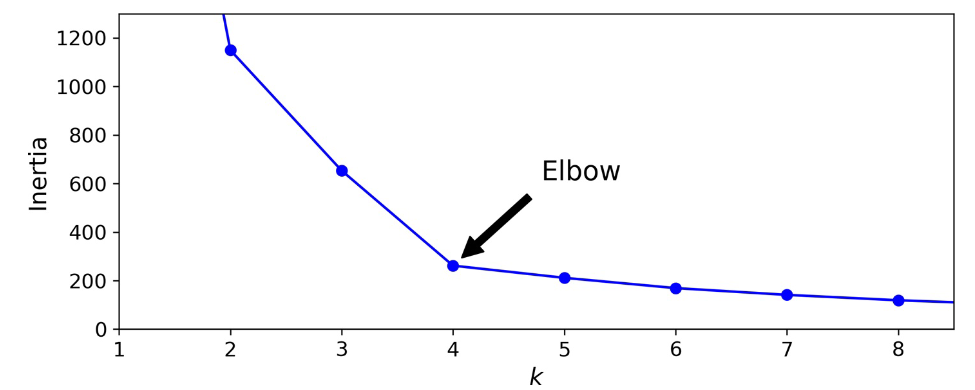

Другий підхід - обрати розбиття, яке дає найбільшу показник сілуету - середне коефіцієнтів сілуету, який обчислюється для кожного примірника як $(b-a)/max(a,b)$, де $a$ - це середня відстань до інших екземплярів у тому самому кластері, $b$ - середня відстань до примірників наступного найближчого кластера. Чи аналізуючи діаграму силуетів. Приклад:
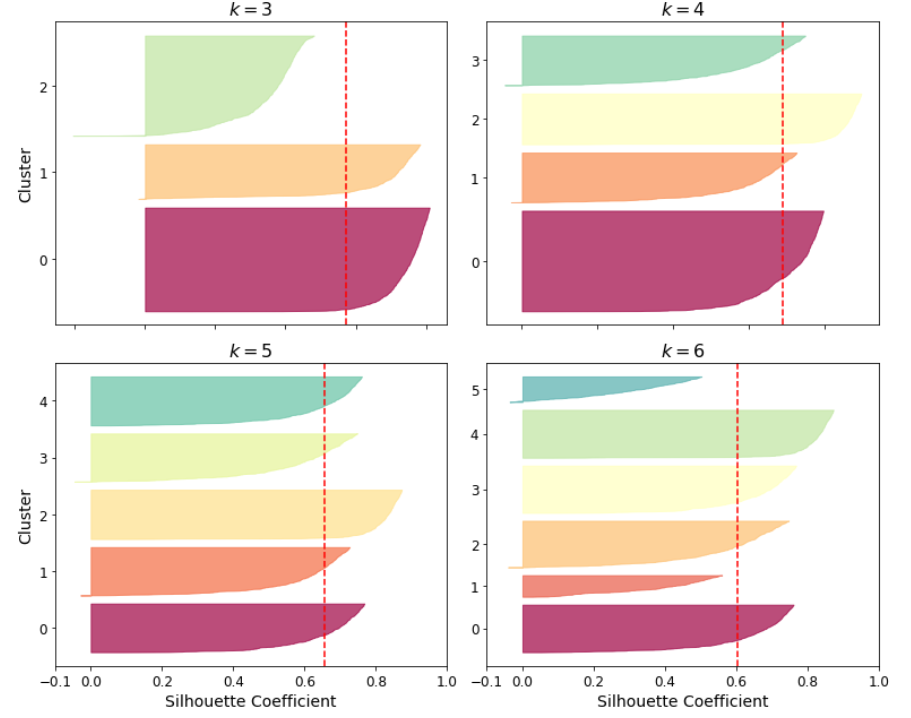

## 4. What is label propagation? Why would you implement it, and how? - Label propagation - це техніка, яка полягає в розповсюдженні лейблів на подібні екземпляри без міток. Цю техніку є сенс використовувати коли мало помічених екземплярів, але є багато непомічених, таким чином можна збільшити кількість помічених екземлярів для навчання з вчителем, що може збільшити якість моделі. Реалізація полягає у визначенні на які екземляри поширювати мітки, для цього можна використати алгоритм кластерізації, наприклад k-means, та поширити найбільш часту чи найбільш найближену до центроїду мітку у кластерах.

## 5. Can you name two clustering algorithms that can scale to large datasets And two that look for regions of high density? - K-Means і BIRCH добре масштабуються для великих наборів даних. А DBSCAN і Mean-Shift шукають регіони з високою щільністю.

## 6. Can you think of a use case where active learning would be useful? How would you implement it? - Активне навчання - це підхід, який застосовується для навчання на датасеті, для якого лейблінг є дорогим. Він полягає в тому, що людина лейбліть ті екземляри, які запитує алгоритм (наприклад ті екземпляри, на яких модель найбільш невпевнена)

## 7. What is the difference between anomaly detection and novelty detection? - Для пошуку аномалій модель тренується на датасеті з аномаліями, та знаходить у ньому аномалії, та виявляти чи є аномальними нові зразки. А у novelty detection - модель тренується на датасеті БЕЗ аномалій, і її задача виявляти новизну у нових зразках.  

## 8. What is a Gaussian mixture? What tasks can you use it for? - Імовірнісна модель, що припускає, що екземпляри були згенеровані з суміші кількох Гаусових розподілів, параметри яких невідомі. Модель тренуючись на даних оцінює параметри розподілів та їх вагу у суміші. Цю модель можна використовувати для оцінки щільності, кластеризації та виявлення аномалій.

## 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model? - Перший спосіб - це обрати ту кількість кластерів, кластеризація за якою мінімізує значення Байєсівського / Akalike інформаційного критерію. Формули: $$BIC=log(m)p - 2log(L̂), AIC = 2p - 2log(L̂),$$ де $m$ - кількість примірників, p - кількість параметрів, $L̂$ - максимальне значення функції правдоподібності (likelihood) моделі.

## Другий спосіб - використати  Bayesian Gaussian mixture model, у якій вказати кільіксть кластерів з запасом і вона сама прибере не потрібні, призначивши їх вагу 0.

## 10. The classic Olivetti faces dataset
contains 400 grayscale 64 × 64–pixel
images of faces. Each image is flattened to a 1D vector of size 4,096. 40
different people were photographed (10 times each), and the usual task
is to train a model that can predict which person is represented in each
picture. Load the dataset using the
sklearn.datasets.fetch_olivetti_faces() function, then split it
into a training set, a validation set, and a test set (note that the dataset is
already scaled between 0 and 1). Since the dataset is quite small, you
probably want to use stratified sampling to ensure that there are the
same number of images per person in each set. Next, cluster the images
using K-Means, and ensure that you have a good number of clusters
(using one of the techniques discussed in this chapter). Visualize the
clusters: do you see similar faces in each cluster?

In [ ]:
olivetti = sklearn.datasets.fetch_olivetti_faces()

In [ ]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

Зменшуємо розмірність використовуючи Principal component analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [ ]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init = 'auto', random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

Графік інерцій, ліктя не видно

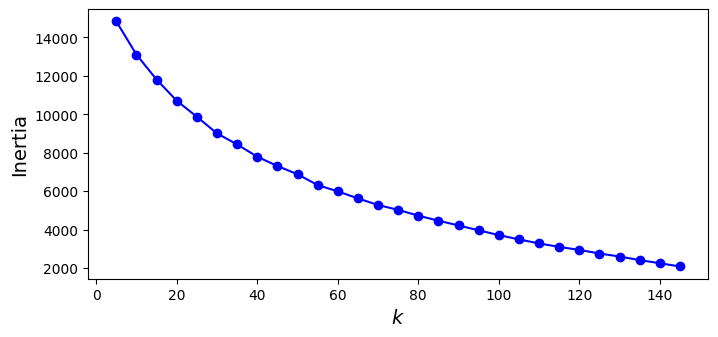

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Графік показника сілуетності, максимум при k=105

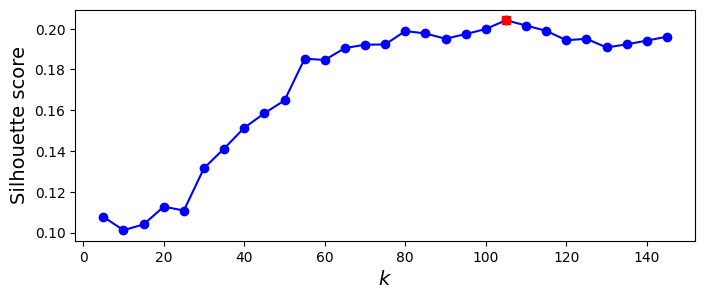

In [ ]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [ ]:
best_k

105

In [ ]:
best_model = kmeans_per_k[best_index]

Візуалізуємо кластери

Cluster 0


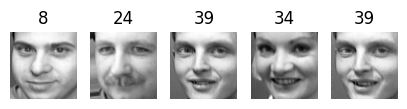

Cluster 1


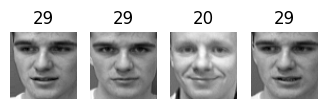

Cluster 2


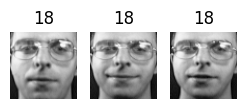

Cluster 3


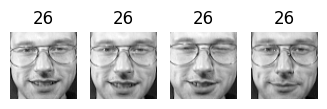

Cluster 4


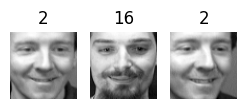

Cluster 5


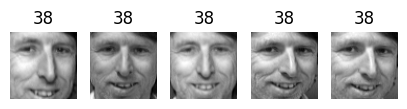

Cluster 6


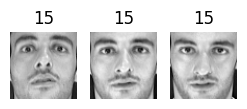

Cluster 7


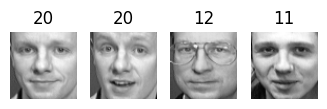

Cluster 8


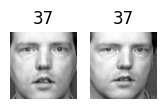

Cluster 9


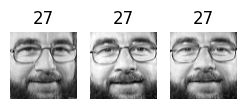

Cluster 10


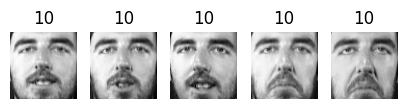

Cluster 11


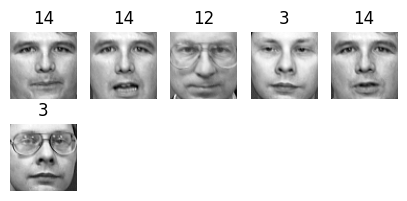

Cluster 12


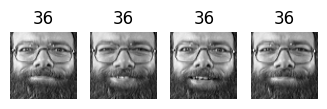

Cluster 13


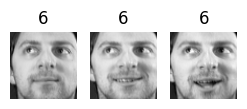

Cluster 14


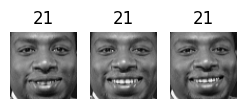

Cluster 15


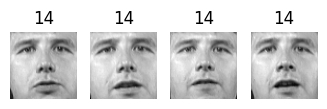

Cluster 16


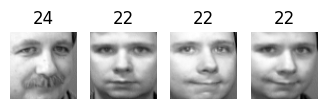

Cluster 17


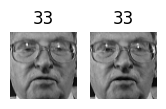

Cluster 18


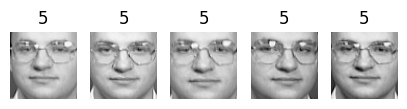

Cluster 19


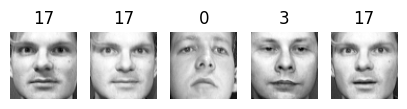

Cluster 20


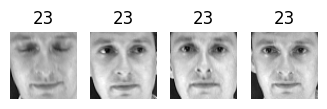

Cluster 21


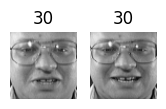

Cluster 22


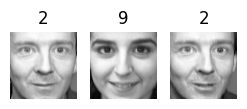

Cluster 23


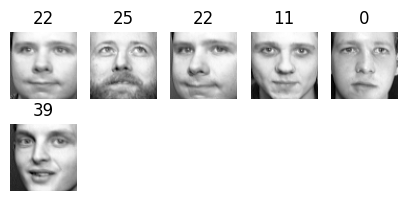

Cluster 24


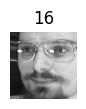

Cluster 25


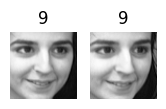

Cluster 26


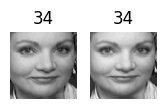

Cluster 27


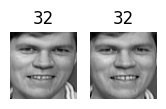

Cluster 28


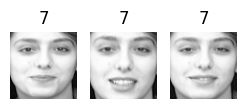

Cluster 29


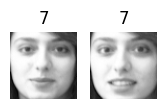

Cluster 30


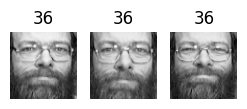

Cluster 31


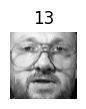

Cluster 32


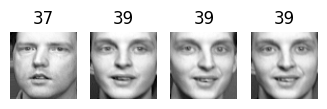

Cluster 33


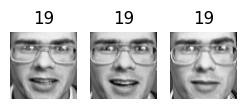

Cluster 34


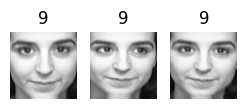

Cluster 35


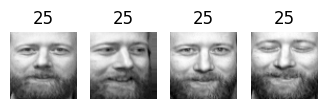

Cluster 36


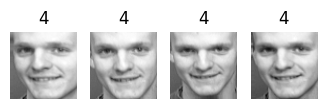

Cluster 37


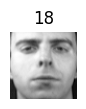

Cluster 38


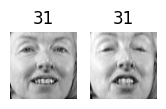

Cluster 39


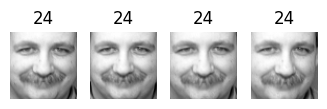

Cluster 40


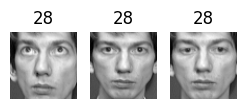

Cluster 41


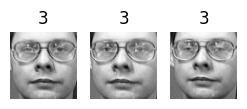

Cluster 42


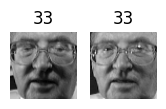

Cluster 43


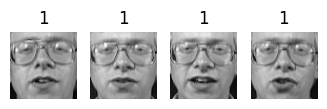

Cluster 44


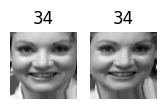

Cluster 45


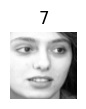

Cluster 46


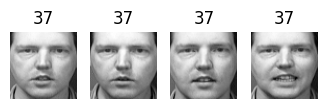

Cluster 47


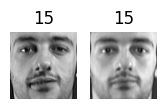

Cluster 48


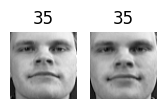

Cluster 49


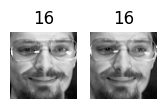

Cluster 50


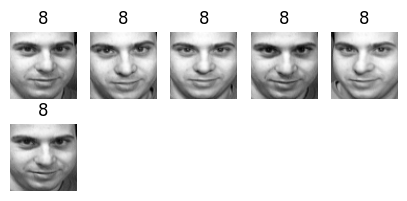

Cluster 51


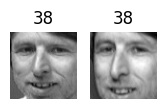

Cluster 52


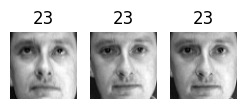

Cluster 53


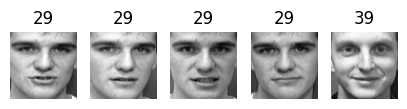

Cluster 54


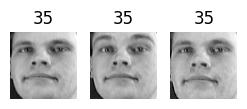

Cluster 55


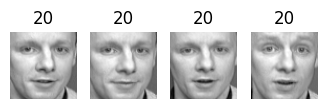

Cluster 56


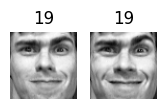

Cluster 57


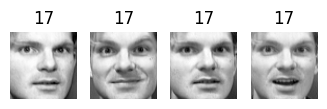

Cluster 58


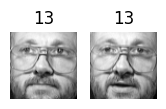

Cluster 59


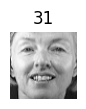

Cluster 60


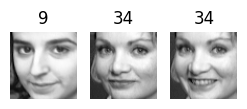

Cluster 61


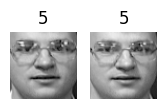

Cluster 62


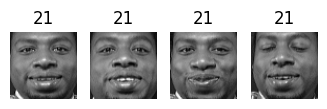

Cluster 63


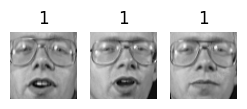

Cluster 64


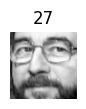

Cluster 65


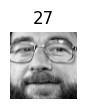

Cluster 66


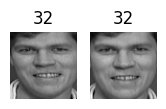

Cluster 67


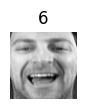

Cluster 68


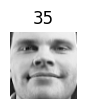

Cluster 69


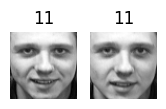

Cluster 70


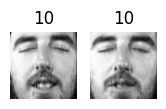

Cluster 71


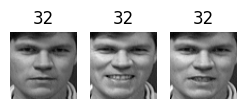

Cluster 72


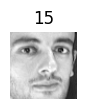

Cluster 73


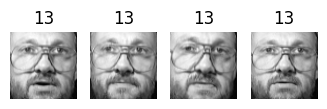

Cluster 74


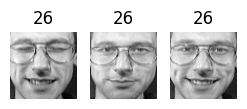

Cluster 75


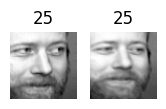

Cluster 76


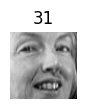

Cluster 77


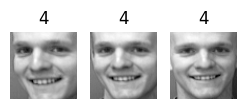

Cluster 78


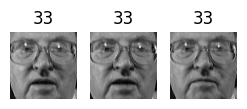

Cluster 79


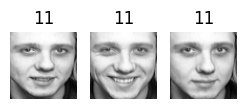

Cluster 80


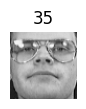

Cluster 81


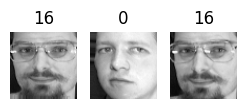

Cluster 82


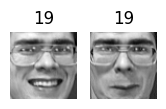

Cluster 83


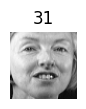

Cluster 84


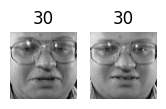

Cluster 85


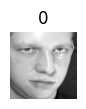

Cluster 86


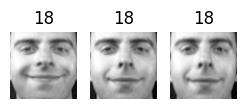

Cluster 87


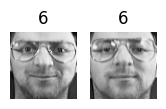

Cluster 88


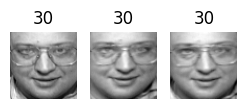

Cluster 89


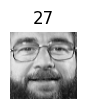

Cluster 90


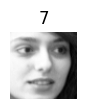

Cluster 91


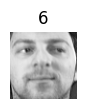

Cluster 92


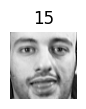

Cluster 93


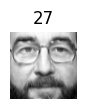

Cluster 94


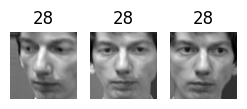

Cluster 95


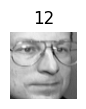

Cluster 96


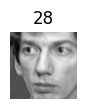

Cluster 97


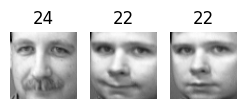

Cluster 98


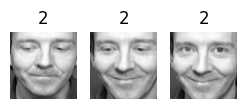

Cluster 99


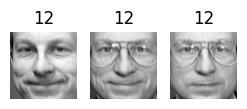

Cluster 100


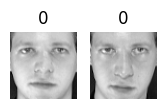

Cluster 101


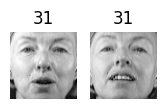

Cluster 102


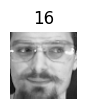

Cluster 103


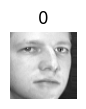

Cluster 104


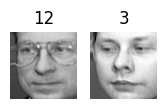

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## 11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.
Next, use K-Means as a dimensionality reduction tool,
and train a classifier on the reduced set. Search for the number of
clusters that allows the classifier to get the best performance: what
performance can you reach? What if you append the features from the
reduced set to the original features (again, searching for the best number
of clusters)?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

K-середніх для зменшення розмірності

In [ ]:
from sklearn.pipeline import Pipeline

for i, kmeans_model in enumerate(kmeans_per_k):
    pipeline = Pipeline([
        ("kmeans", kmeans_model),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    n_clusters = k_range[i]
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.525
15 0.5875
20 0.5875
25 0.65
30 0.6625
35 0.6875
40 0.75
45 0.7
50 0.7375
55 0.6875
60 0.7125
65 0.7625
70 0.7625
75 0.7625
80 0.775
85 0.7375
90 0.75
95 0.7625
100 0.7375
105 0.7625
110 0.75
115 0.7625
120 0.725
125 0.775
130 0.75
135 0.75
140 0.7625
145 0.7625


In [ ]:
from sklearn.preprocessing import OneHotEncoder
max_score = 0
for i, kmeans_model in enumerate(kmeans_per_k):
    n_clusters = k_range[i]
    onehot_enc = OneHotEncoder(sparse_output=False)
    onehot_clusters_train = onehot_enc.fit_transform(pd.DataFrame(kmeans_model.predict(X_train_pca)))
    X_train_extended = np.c_[X_train_pca, onehot_clusters_train]
    X_valid_extended = np.c_[X_valid_pca, onehot_enc.transform(pd.DataFrame(kmeans_model.predict(X_valid_pca)))]
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_extended, y_train)
    score = clf.score(X_valid_extended, y_valid)
    print(n_clusters, score)
    max_score = max(score, max_score)
print("max:", max_score)

5 0.8875
10 0.9375
15 0.9375
20 0.9375
25 0.9125
30 0.925
35 0.9375
40 0.925
45 0.9
50 0.925
55 0.925
60 0.9125
65 0.9375
70 0.925
75 0.95
80 0.95
85 0.9625
90 0.8875
95 0.9
100 0.9125
105 0.9375
110 0.9375
115 0.9125
120 0.95
125 0.925
130 0.9
135 0.9125
140 0.9375
145 0.9125
max: 0.9625


## 12. Train a Gaussian mixture model on the Olivetti faces dataset.
To speed up the algorithm, you should probably reduce the dataset’s
dimensionality (e.g., use PCA, preserving 99% of the variance). Use the
model to generate some new faces (using the sample() method), and
visualize them (if you used PCA, you will need to use its
inverse_transform() method). Try to modify some images (e.g.,
rotate, flip, darken) and see if the model can detect the anomalies (i.e.,
compare the output of the score_samples() method for normal images
and for anomalies)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=1)
gm.fit(X_train_pca)

GaussianMixture(n_components=40, random_state=1)

In [ ]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

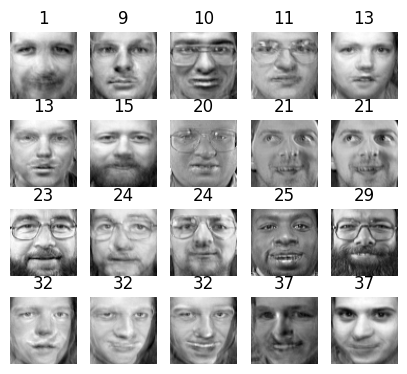

In [ ]:
plot_faces(gen_faces, y_gen_faces)

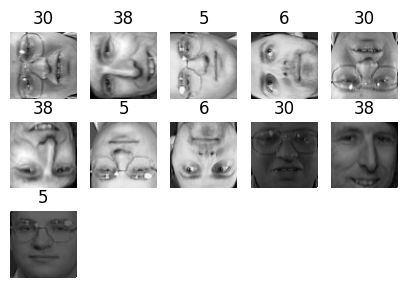

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 4
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_anomaly_faces = np.r_[rotated, flipped, darkened]
y_anomaly_faces = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_anomaly_faces, y_anomaly_faces)

In [ ]:
gm.score_samples(pca.transform(X_anomaly_faces)) # логарифм правдоподібності

array([-2.25008559e+07, -1.73014217e+07, -3.96415388e+07, -4.60118378e+07,
       -3.20479134e+07, -1.35426771e+07, -2.90882870e+07, -3.91129228e+07,
       -9.25149143e+07, -1.03272280e+08, -5.41696808e+07])

In [ ]:
gm.score_samples(X_train_pca[:10])

array([1163.02020819, 1112.17308106, 1148.47710533, 1170.67602759,
       1118.92257224, 1147.58793932, 1084.09630391, 1111.31685071,
       1110.25455998, 1112.21777985])

## 13. Some dimensionality reduction techniques can also be used for anomaly detection.
For example, take the Olivetti faces dataset and reduce it with
PCA, preserving 99% of the variance. Then compute the reconstruction
error for each image. Next, take some of the modified images you built
in the previous exercise, and look at their reconstruction error: notice
how much larger the reconstruction error is. If you plot a reconstructed
image, you will see why: it tries to reconstruct a normal face.

In [ ]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [ ]:
reconstruction_errors(pca, X_train).mean()

0.00019205349

In [ ]:
reconstruction_errors(pca, X_anomaly_faces).mean()

0.0050833877

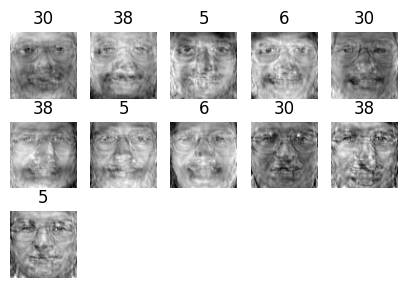

In [ ]:
X_anomaly_faces_reconstructed = pca.inverse_transform(pca.transform(X_anomaly_faces))
plot_faces(X_anomaly_faces_reconstructed, y_anomaly_faces)

# Кластеризація на іншому наборі даних

## Loading dataset

In [ ]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/MIS'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [ ]:
cust_df = pd.read_csv(data_dir + '/segmentation_data.csv')

In [ ]:
cust_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
cust_df.drop(columns=['ID'], inplace = True)

In [ ]:
cust_df.shape[0]

2000

## Clustering

In [ ]:
k_range = range(2, 25, 1)
kmeans_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init = 'auto', random_state=42).fit(cust_df)
    kmeans_per_k.append(kmeans)

###Графік інерцій

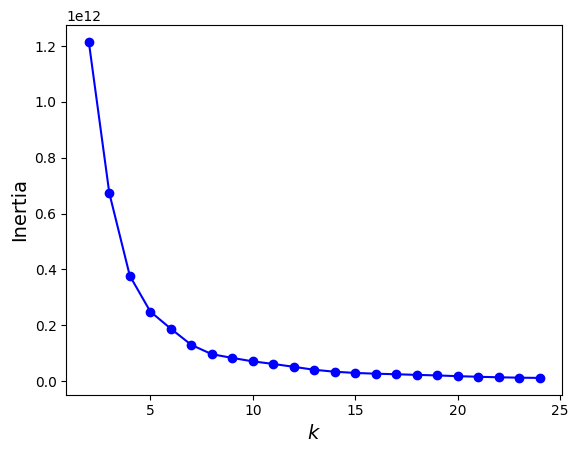

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

за методом ліктя - k=5

### Показники сілуетності

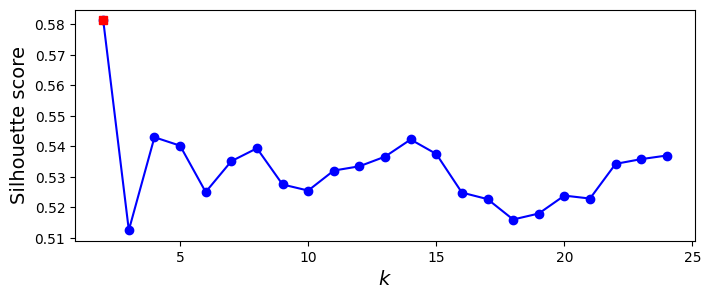

In [ ]:
silhouette_scores = [silhouette_score(cust_df, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

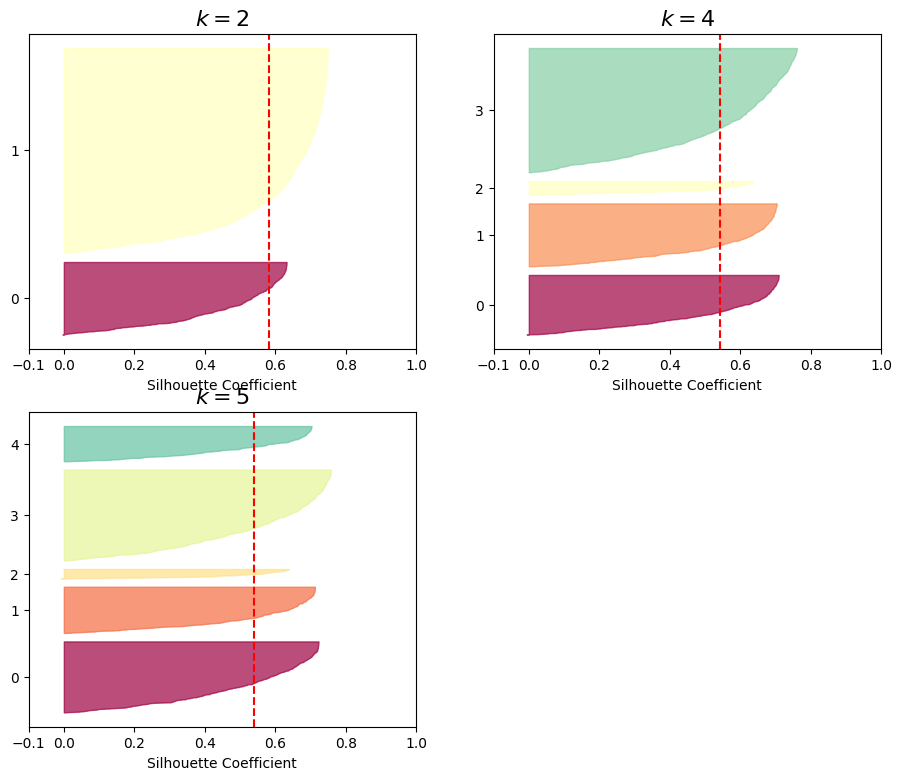

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))
ind = 1
for k in (2, 4, 5):
    plt.subplot(2, 2, ind)
    ind += 1
    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(cust_df, y_pred)

    padding = cust_df.shape[0] // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()



5 виглядає непогано, враховуючи що воно також виходить за правилом ліктя, зупинимось на 5-ти кластерах

### Аналіз кластерів

In [59]:
n_clusters = 5
cust_df['cluster'] `=  kmeans_per_k[n_clusters - 2].labels_

In [60]:
cust_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,4
4,0,0,53,1,149031,1,1,0


#### Середній дохід по кластерам

In [61]:
mean_incomes = cust_df.groupby('cluster')['Income'].agg(['mean'])

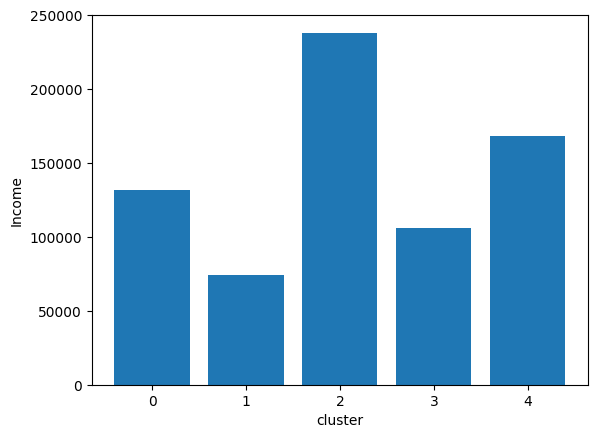

In [85]:
plt.bar(x=mean_incomes.index, height=mean_incomes['mean'])
plt.gca().set_yticks([0, 50000, 100000, 150000, 200000, 250000]);
plt.xlabel('cluster')
plt.ylabel('Income');

#### Середній вік по кластерам

In [63]:
mean_age = cust_df.groupby('cluster')['Age'].agg(['mean'])

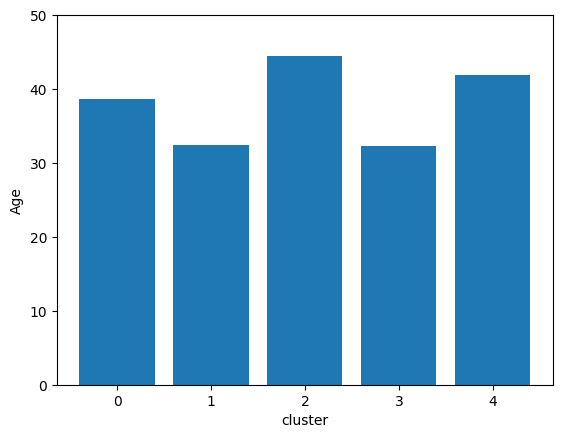

In [86]:
plt.bar(x=mean_age.index, height=mean_age['mean'])
plt.gca().set_yticks([0, 10, 20, 30, 40, 50]);
plt.xlabel('cluster')
plt.ylabel('Age');

#### Освіта по кластерам

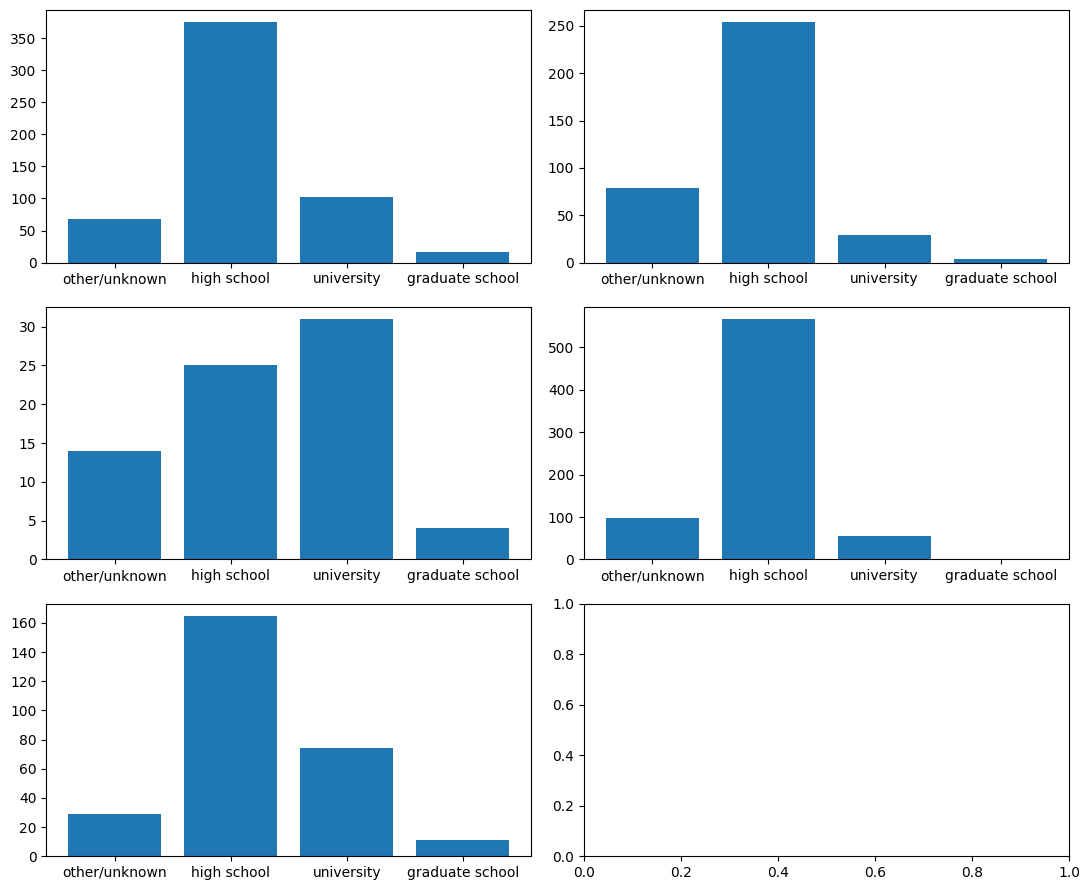

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 9))
for k in range(0, n_clusters):
    heights = [cust_df[(cust_df['cluster'] == k) & (cust_df['Education'] == ed_ind)].shape[0] for ed_ind in range(0, 4)]
    axes[k // 2, k % 2].bar(x=['other/unknown', 'high school', 'university', 'graduate school'], height=heights)
fig.tight_layout()
plt.show()

#### Рівень кваліфікації по кластерам

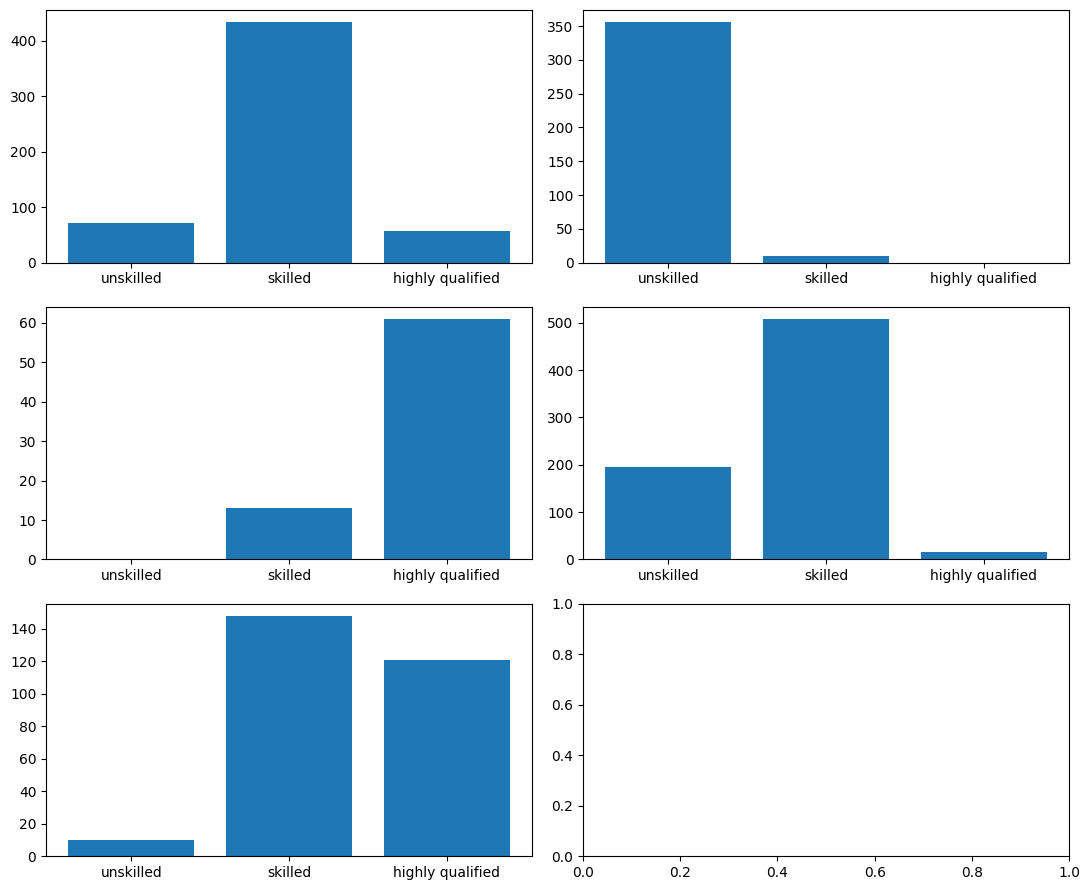

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 9))
for k in range(0, n_clusters):
    heights = [cust_df[(cust_df['cluster'] == k) & (cust_df['Occupation'] == ind)].shape[0] for ind in range(0, 3)]
    axes[k // 2, k % 2].bar(x=['unskilled', 'skilled', 'highly qualified'], height=heights)
fig.tight_layout()
plt.show()

#### Місце проживання по кластерам

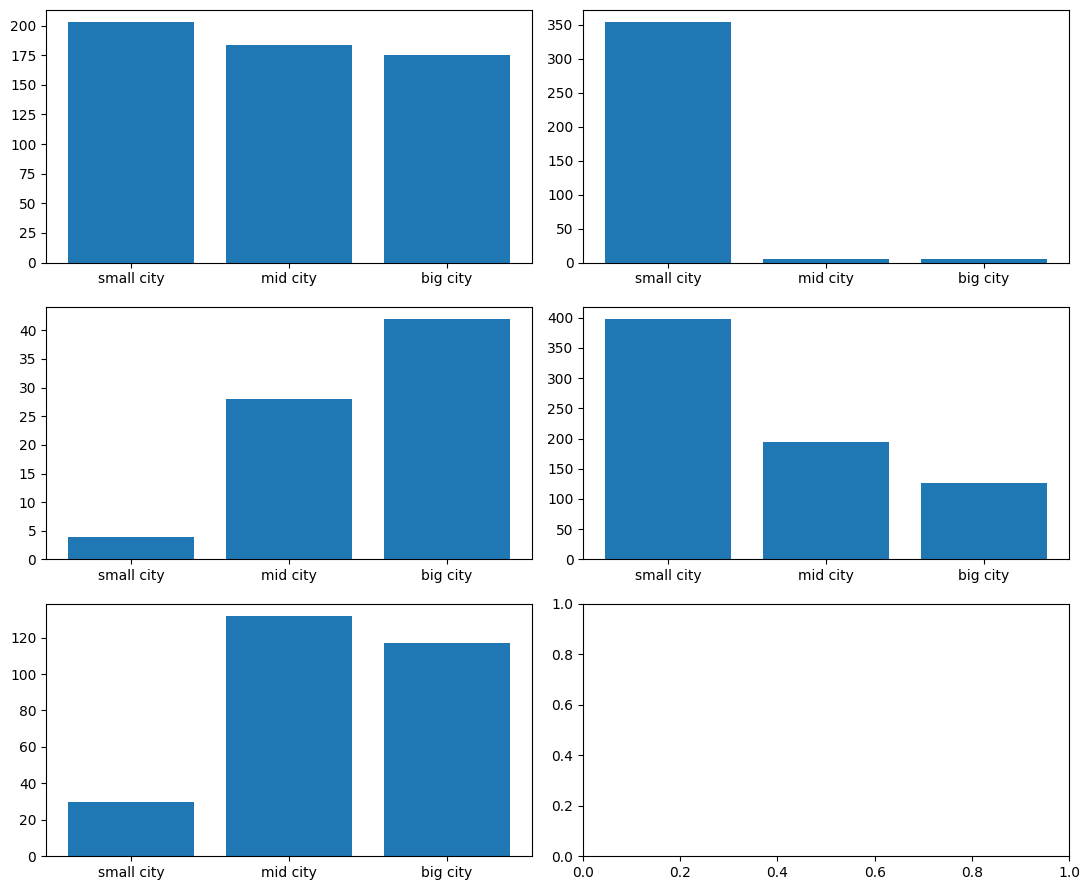

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 9))
for k in range(0, n_clusters):
    heights = [cust_df[(cust_df['cluster'] == k) & (cust_df['Settlement size'] == ind)].shape[0] for ind in range(0, 3)]
    axes[k // 2, k % 2].bar(x=['small city', 'mid city', 'big city'], height=heights)
fig.tight_layout()
plt.show()

#### Дохід від віку кластеринг

Text(0, 0.5, 'Income')

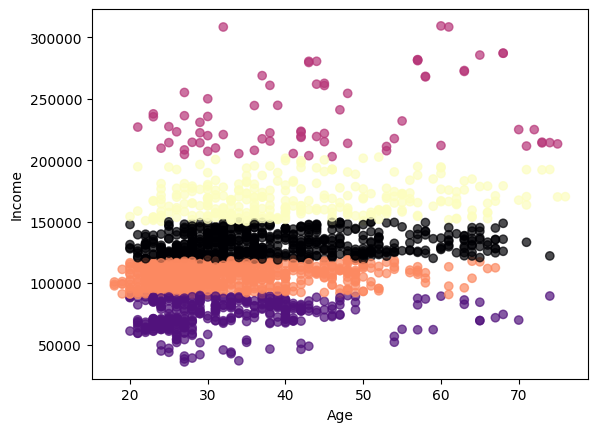

In [ ]:
plt.scatter(data = cust_df, x = 'Age', y = 'Income', c = 'cluster', cmap='magma', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Income")